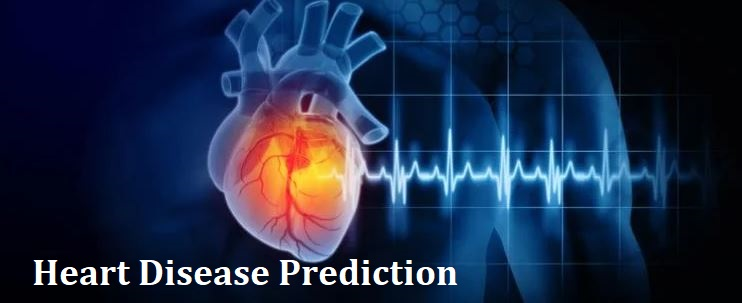

## Table of Content

1. [Background Research](#Background_Research)
2. [Objective](#objective)
3. [Data Dictionary of Dataset](#data_dictionary)
4. [Import Important Library](#import_library)
5. [Import Dataset and EDA](#eda)
- 5.1. [Import Dataset and analysis using "ydata_profiling"](#ydata_profiling)
- 5.2. [Exploratory Data Analysis (EDA)](#manual_eda)
6. [Split Dataset for Training and Testing](#split_dataset)
- 6.1. [Separate X, Y values](#separate)
- 6.2. [Split Dataset for Training and Testing](#split_for_trainig_testing)
7. [Train and Test with Different Algorithm](#train_test)
8. [Create Function for Accuracy](#accuracy_function)
- 8.1. [Create function for make Dataframe for all Accuracy](#dataframe_function)
- 8.2. [Plot Accuracy](#plot_accuracy)
- 8.3. [Accuracy Analysis](#accuracy_analysis)
9. [Check Outlier](#outlier)
10. [Feature Engineering](#feature_engineering)
- 10.1. [Feature Selection using "SelectKBest"](#select_kbest)
- 10.2. [ExtraTreesClassifier](#extra_tree)
11. [Scalling](#scalling)
- 11.1. [MinMaxScaler](#minmax)
 - 11.1.1 [Again Train and Test for Scalling Data](#again_tt)
12. [Analysis Summery](#accuracy_summery)
13. [Model Save and Revalidate](#save_model)
14. [Conclusion:](#conclusion)

## Process of Work

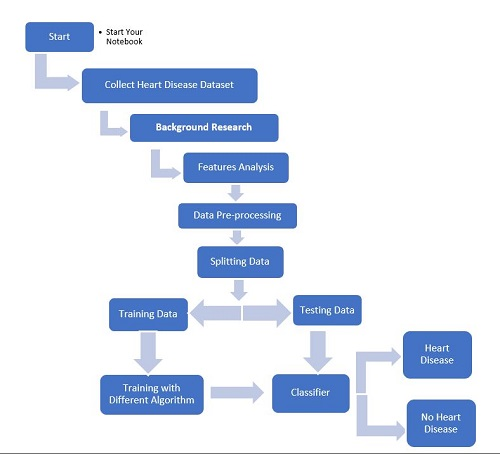

## 1. Background Research <a id ="Background_Research"> </a>

- Heart disease, also known as cardiovascular disease, is a general term that refers to a group of conditions that affect the heart and blood vessels. The most common forms of heart disease include coronary artery disease, heart valve disease, and heart failure.

- Current practices for the prevention and treatment of heart disease include lifestyle changes such as maintaining a healthy diet, regular exercise, and not smoking. Medications such as statins, blood pressure medications, and anticoagulants are also commonly used to lower the risk of heart disease. In some cases, interventional procedures such as angioplasty or bypass surgery may be necessary to treat advanced cases of heart disease.

- Background research on heart disease has led to a better understanding of the underlying causes and risk factors for the condition. Some of the major risk factors for heart disease include high blood pressure, high cholesterol, diabetes, smoking, and a family history of the condition. Studies have also shown that certain lifestyle factors, such as diet and physical activity, can have a significant impact on the development of heart disease.

- Recent research has also focused on identifying new treatments for heart disease, as well as ways to improve the effectiveness of existing treatments. This has led to the development of new medications and procedures, such as minimally invasive surgeries and the use of stem cells to repair damaged heart tissue.

- Overall, the field of heart disease research is constantly evolving, with new findings and treatments being developed all the time.

## 2. Objective <a id ="objective"> </a>

Do classification (Diseased or Not Diseased) on this data and choose the best model with highest accuracy.

## 3. Dataset Data Dictionary <a id ="data_dictionary"> </a>

1. age : Age of persons<br>
2. sex : Gender of persons<br>
3. cp : Chest pain type (4 values)<br>
4. trtbps : Resting blood pressure<br>
5. chol : Serum cholestrol in mg/dl<br>
6. fbs : Fasting blood sugar > 120 mg/dl<br>
7. restecg : Resting electrocardio results(values 0,1,2)<br>
8. thalach : Maximum heart rate achieved<br>
9. exng : Exercise induced angina<br>
10. oldpeak : ST depression induced by exercise relative to rest<br>
11. slp : The slope of the peak exercise ST segment<br>
12. caa : Number of major vessels(0-3) colored by flourosopy<br>
13. thall : 0=normal, 1=fixed defect, 2 = reversable defect<br>
14. output : Target column, 1 = Diseased, 0 = Not Diseased 

Complete attribute documentation:

1. age: age of persons 
2. sex: gender of persons (1 = male; 0 = female)
3. cp: chest pain type
- Value 1: typical angina <br>
- Value 2: atypical angina <br>
- Value 3: non-anginal pain <br>
- Value 4: asymptomatic <br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
- Value 0: normal <br>
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>

8. thalach: maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest
11. slp: the slope of the peak exercise ST segment
- Value 0: upsloping <br>
- Value 1: flat <br>
- Value 2: downsloping <br>

12. caa: number of major vessels (0-3) colored by flourosopy

13. (thall) Dipyridamole-Thallium scan results may show:

- Normal perfusion study – normal blood supply to all areas of the heart muscle
- Reversible perfusion defect – decreased blood flow to an area of heart muscle, due to inadequate blood supply from a particular coronary artery (blood vessel around the heart)
- Fixed perfusion defect – decreased blood flow to an area of heart muscle, due to permanently damaged muscle (essentially a scar in the heart muscle)
- Value 0: Null value
- Value 1: Normal blood flow.
- Value 2: Fixed defect (no blood flow in some part of the heart)
- Value 3: Reversable defect (a blood flow is observed but it is not normal)


## 4. Import Important Library <a id ="import_library"> </a>

In [1]:
#!pip install ydata-profiling

In [2]:
#!pip install streamlit

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,auc, plot_roc_curve,roc_auc_score,roc_curve,roc_auc_score,plot_confusion_matrix,plot_precision_recall_curve
from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport
# Import Different Algorithm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

## 5. Import Dataset and EDA <a id ="eda"> </a>

### 5.1 Import Dataset and analysis using "ydata_profiling" <a id ="ydata_profiling"> </a>

In [5]:
#df=pd.read_csv("/content/drive/MyDrive/Heart Disease.csv")
df=pd.read_csv("/kaggle/input/heartdiseasedataset/heart_disease_dataset.csv")

In [6]:
profile = ProfileReport(df, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
#pip install matplotlib --upgrade

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

### 5.2 Exploratory Data Analysis (EDA) <a id ="manual_eda"> </a>

In [12]:
df.output.value_counts() 

1    165
0    138
Name: output, dtype: int64

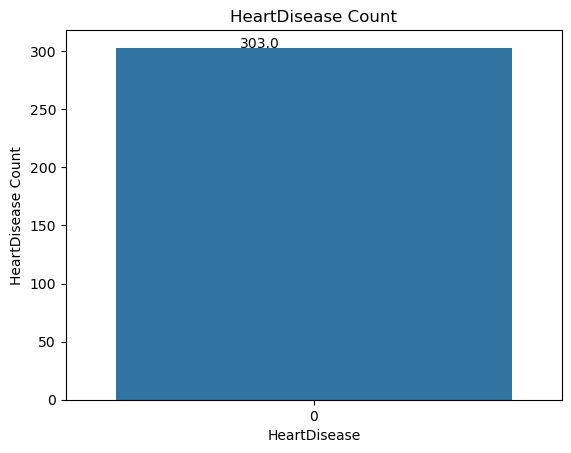

In [13]:
ax=sns.countplot(df['output'])
# Set label for x-axis
ax.set_xlabel( "HeartDisease")

# Set Value for every count
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Set label for y-axis
ax.set_ylabel( "HeartDisease Count")
  
# Set title for plot
ax.set_title(  "HeartDisease Count")
# Display figure
plt.show()

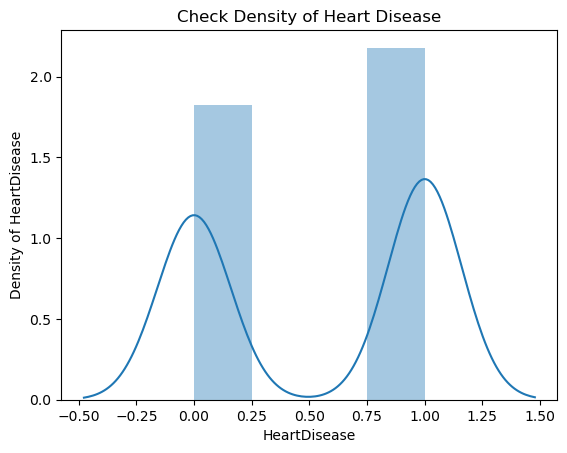

In [14]:
ax=sns.distplot(df['output'])
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [15]:
No_HeartDisease  = (138/303) * 100
HeartDisease =  (165/303) * 100

print('HeartDisease present are {} percent of total people\'s of datasets'.format(HeartDisease))
print('No HeartDisease are {} percent of total people\'s of datasets'.format(No_HeartDisease))

HeartDisease present are 54.45544554455446 percent of total people's of datasets
No HeartDisease are 45.54455445544555 percent of total people's of datasets


#### So, This is a Balanced Dataset.

In [16]:
df.isnull().sum() # There are no null Value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [17]:
df['thall'].unique()

array([1, 2, 3, 0])

In [18]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [19]:
#Note: if you are seeing this error message: AttributeError: 'AxesSubplot' object has no attribute 'bar_label', 
#it means that you do not have the right matplotlib library installed. Please execute the following code:
#!pip install matplotlib --upgrade

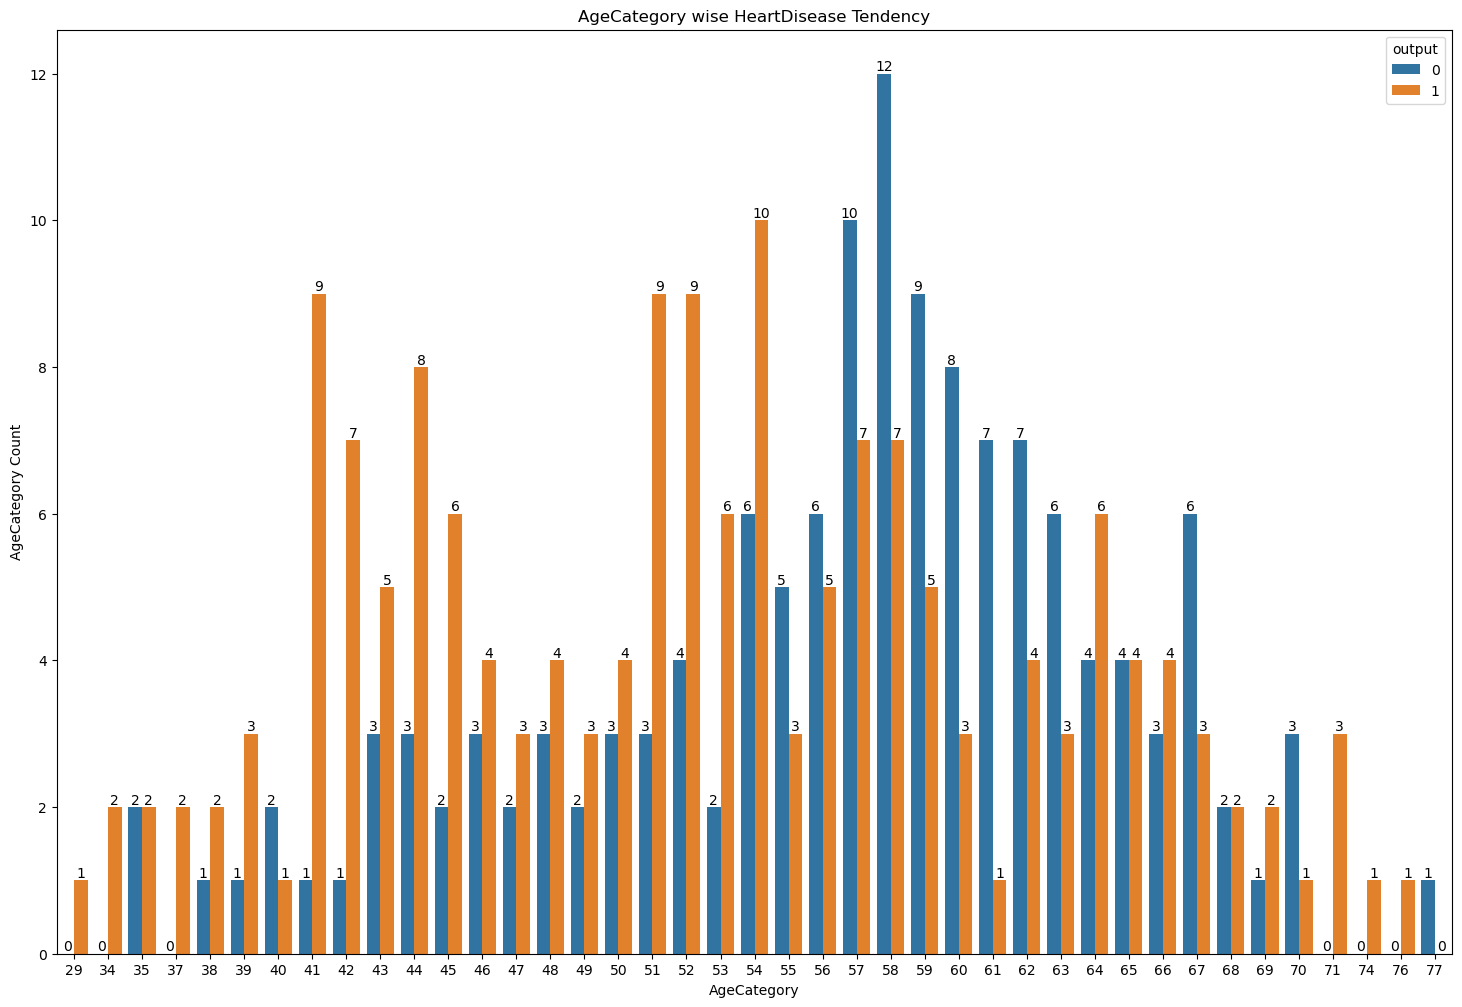

In [20]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age', hue='output', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [22]:
features=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

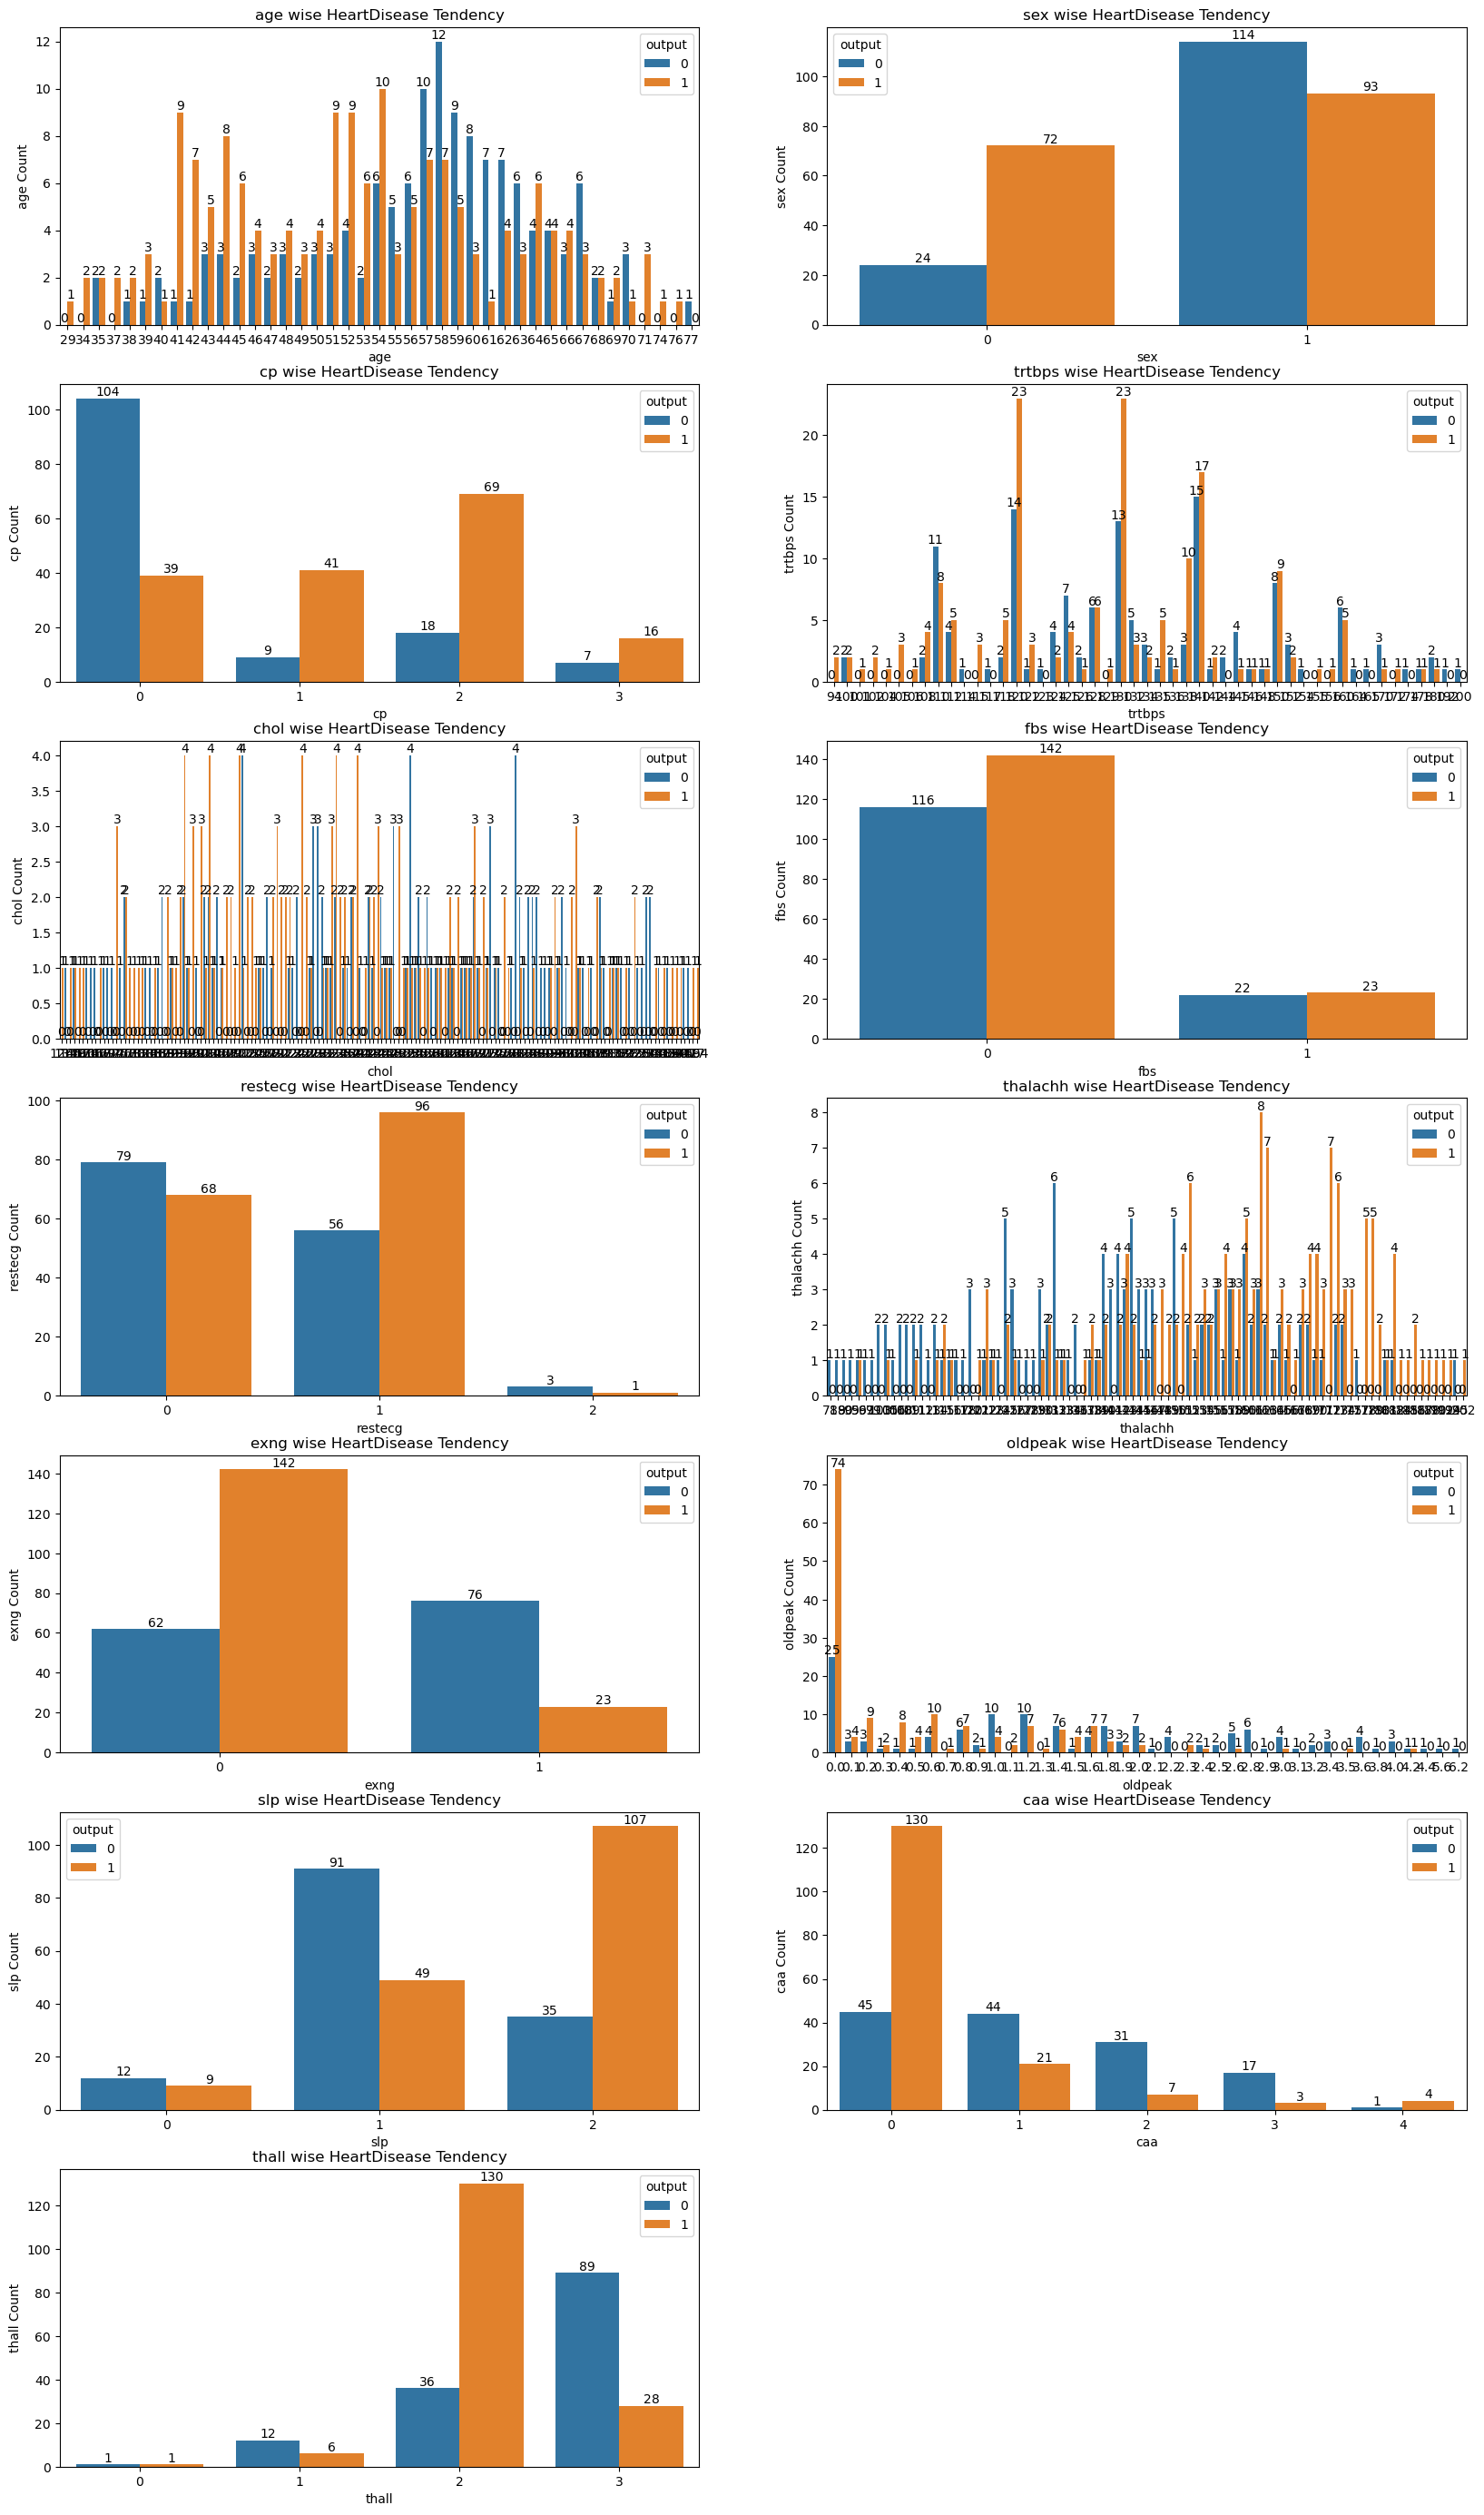

In [23]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=features[i-1],hue='output',data=df)
    #ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(features[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(features[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

#### High Probability of Heart Disease:
- 1. Female Person
- 2. Chest pain type (CP) > <b> Value 1: typical angina</b>
- 3. The slope of the peak exercise ST segment (slp) > <b>Value 2: downsloping </b>
- 4. (thall) Dipyridamole-Thallium scan results ><b> Value 2: Fixed defect (no blood flow in some part of the heart)</b>

In [24]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Heatmap 

<AxesSubplot:>

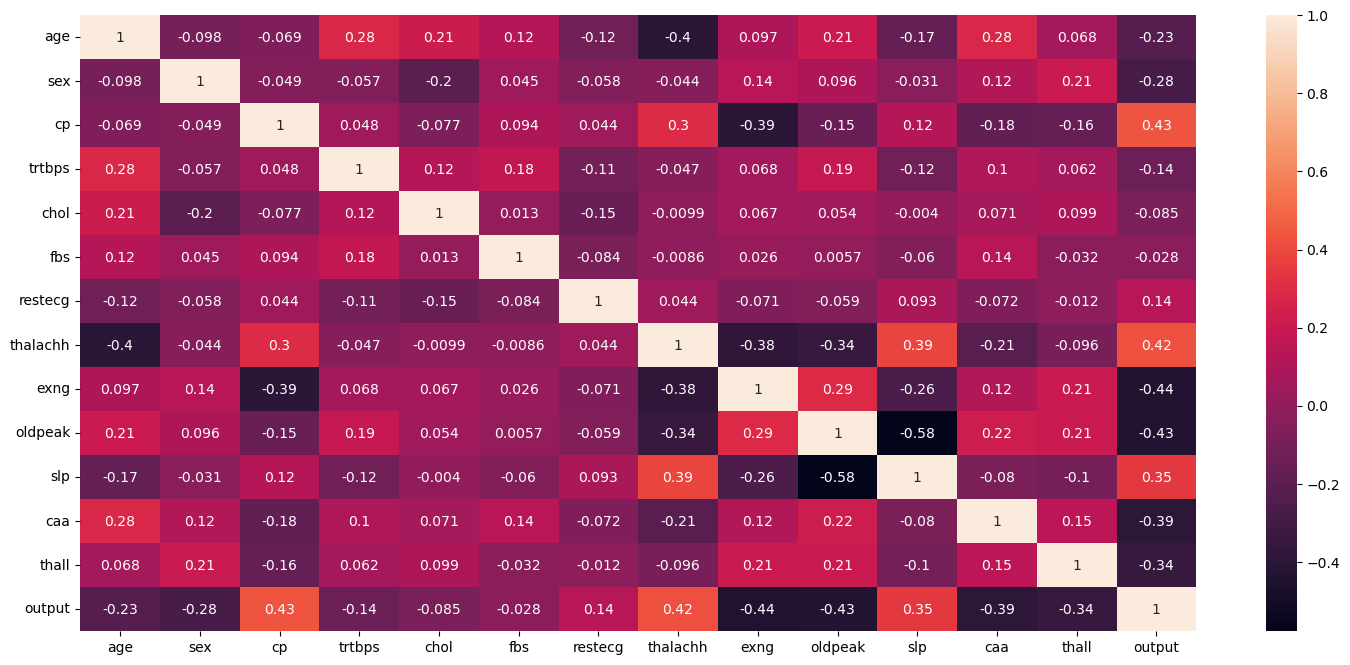

In [25]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),annot=True)

In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 6. Separate X, Y values And Split Dataset for Training and Testing  <a id ="split_dataset"> </a>

### 6.1 Separate X, Y values <a id ="separate"> </a>

In [27]:
X=df.drop('output',axis=1)

In [28]:
Y=df['output']

In [29]:
X.shape

(303, 13)

### 6.2. Split Dataset for Training and Testing  <a id ="split_for_trainig_testing"> </a>

### Try to find best random state

In [30]:
max_state = 0
max_score_dif =0.9
accuracy_diff = []
for i in range(50):
    Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=i)
    logR=LogisticRegression()
    logR.fit(Xtrain,Ytrain)
    logR_predict=logR.predict(Xtest)

    Tr_score=logR.score(Xtrain,Ytrain)
    Tst_score=logR.score(Xtest,Ytest)

    score_dif = Tr_score-Tst_score
    
    if (max_score_dif > score_dif) and (score_dif > 0):
        max_state = i
        max_score_dif = score_dif
        accuracy_diff.append(score_dif)

In [31]:
#max_state=40

In [32]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=max_state)

## 7. Train and Test with Different Algorithm  <a id ="train_test"> </a>

### Logistic Regression

In [33]:
logR=LogisticRegression()
logR.fit(Xtrain,Ytrain)
logR_predict=logR.predict(Xtest)

Tr_score=logR.score(Xtrain,Ytrain)
Tst_score=logR.score(Xtest,Ytest)
print("max_state: ",max_state)
print("max_score_dif:",max_score_dif)
print("Complete LogisticRegression Training Score ! ",Tr_score, "With Random State: ",max_state)
print("Complete LogisticRegression Test Score ! ",Tst_score, "With Random State: ",max_state, '\n')

print("con_matrix: ",'\n',confusion_matrix(Ytest,logR_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,logR_predict),"\n")


max_state:  14
max_score_dif: 0.0013477088948787852
Complete LogisticRegression Training Score !  0.8584905660377359 With Random State:  14
Complete LogisticRegression Test Score !  0.8571428571428571 With Random State:  14 

con_matrix:  
 [[32 10]
 [ 3 46]] 

Accuracy:  
 0.8571428571428571 



### SVM

In [34]:
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)
svc_predict=svc.predict(Xtest)
svc_train_score=svc.score(Xtrain,Ytrain)
svc_test_score=svc.score(Xtest,Ytest)
print("Complete SVC Training !",svc_train_score)
print("Complete SVC Test!",svc_test_score)

Complete SVC Training ! 0.6981132075471698
Complete SVC Test! 0.6263736263736264


### KNN

In [35]:
knn=KNeighborsClassifier(n_neighbors= 5,metric='jaccard')
knn.fit(Xtrain,Ytrain)
knn_predict=knn.predict(Xtest)
knn_train_score=knn.score(Xtrain,Ytrain)
knn_test_score=knn.score(Xtest,Ytest)
print("Complete KNNClassification Training !",knn_train_score)
print("Complete KNNClassification Test!",knn_test_score)

Complete KNNClassification Training ! 0.8254716981132075
Complete KNNClassification Test! 0.7912087912087912


### XGBoost

In [36]:
xgb = XGBClassifier(max_depth=2, n_estimators=10)
xgb.fit(Xtrain,Ytrain)
xgb_predict=xgb.predict(Xtest)
xgb_train_score=xgb.score(Xtrain,Ytrain)
xgb_test_score=xgb.score(Xtest,Ytest)
print("Complete XGBClassifier Training !",xgb_train_score)
print("Complete XGBClassifier Test!",xgb_test_score)

Complete XGBClassifier Training ! 0.8867924528301887
Complete XGBClassifier Test! 0.8241758241758241


### AdaBoost

In [37]:
ada=AdaBoostClassifier(n_estimators=20, learning_rate=0.8)
ada.fit(Xtrain,Ytrain)
ada_predict=ada.predict(Xtest)
ada_train_score=ada.score(Xtrain,Ytrain)
ada_test_score=ada.score(Xtest,Ytest)
print("Complete AdaBoost Training !",ada_train_score)
print("Complete AdaBoost Test!",ada_test_score)

Complete AdaBoost Training ! 0.9009433962264151
Complete AdaBoost Test! 0.7802197802197802


### GradientBoosting Classifier

In [38]:
gBoost=GradientBoostingClassifier(max_depth=2,ccp_alpha=0.01)
gBoost.fit(Xtrain,Ytrain)
gBoost_predict=gBoost.predict(Xtest)
gBoost_train_score=gBoost.score(Xtrain,Ytrain)
gBoost_test_score=gBoost.score(Xtest,Ytest)
print("Complete GradientBoosting Classifier Training ! ",gBoost_train_score)
print("Complete GradientBoosting Classifier Test!",gBoost_test_score)

Complete GradientBoosting Classifier Training !  0.8632075471698113
Complete GradientBoosting Classifier Test! 0.8241758241758241


### Decision Tree

In [39]:
dtclf=DecisionTreeClassifier(max_depth=2,ccp_alpha=0.1)
dtclf.fit(Xtrain,Ytrain)
dtclf_predict=dtclf.predict(Xtest)
dtclf_train_score=dtclf.score(Xtrain,Ytrain)
dtclf_test_score=dtclf.score(Xtest,Ytest)
print("Complete Decision Tree Classifier Training ! ",dtclf_train_score)
print("Complete Decision Tree Classifier Test!",dtclf_test_score)

Complete Decision Tree Classifier Training !  0.7688679245283019
Complete Decision Tree Classifier Test! 0.6923076923076923


### Random Forest

In [40]:
rfclf = RandomForestClassifier(max_depth=2, random_state=max_state)
rfclf.fit(Xtrain,Ytrain)
rfclf_predict=rfclf.predict(Xtest)
rfclf_train_score=rfclf.score(Xtrain,Ytrain)
rfclf_test_score=rfclf.score(Xtest,Ytest)
print("Complete Random Forest Classifier Training ! ",rfclf_train_score)
print("Complete Random Forest Classifier Test!",rfclf_test_score)

Complete Random Forest Classifier Training !  0.8726415094339622
Complete Random Forest Classifier Test! 0.8461538461538461


## 8. Create Function for Accuracy  <a id ="accuracy_function"> </a>

In [41]:
def model(Xtrain,Xtest,Ytrain,Ytest):
    model_name=['SVM Classifier(SVC)','XGBClassifier',
                'AdaBoostClassifier','GradientBoostingClassifier',
                'DecisionTreeClassifier','RandomForest Classifier','KNNClassification','LogisticRegression']
    accuracy=[]
    
    #SVM Classifier(SVC)
    svc.fit(Xtrain,Ytrain)
    svc_predict=svc.predict(Xtest)
    accuracy.append(svc.score(Xtest,Ytest)) 
    print("Complete SVM Classifier(SVC) !")    
                            
    #XGBClassifier
    xgb.fit(Xtrain,Ytrain)
    xgb_predict=xgb.predict(Xtest)
    accuracy.append(xgb.score(Xtest,Ytest))
    print("Complete XGBClassifier !")
                            
    #AdaBoostClassification
    ada.fit(Xtrain,Ytrain)
    ada_predict=ada.predict(Xtest)
    accuracy.append(ada.score(Xtest,Ytest))
    print("Complete AdaBoostClassification !")
                            
    #GradientBoostingClassifier
    gBoost.fit(Xtrain,Ytrain)
    gBoost_predict=gBoost.predict(Xtest)
    accuracy.append(gBoost.score(Xtest,Ytest))
    print("Complete GradientBoostingClassifier !") 
                            
    #DecisionTreeClassifier
    dtclf.fit(Xtrain,Ytrain)
    dtclf_predict=dtclf.predict(Xtest)
    accuracy.append(dtclf.score(Xtest,Ytest))
    print("Complete DecisionTreeClassifier !") 
                              
    #RandomForestClassifier
    rfclf.fit(Xtrain,Ytrain)
    rfclf_predict=rfclf.predict(Xtest)
    accuracy.append(rfclf.score(Xtest,Ytest))
    print("Complete RandomForestClassifier !") 
    
    #KNNClassification
    knn.fit(Xtrain,Ytrain)
    knn_predict=knn.predict(Xtest)
    accuracy.append(knn.score(Xtest,Ytest))
    print("Complete KNNClassification !")
    
    #LogisticRegression
    logR.fit(Xtrain,Ytrain)
    logR_predict=logR.predict(Xtest)
    accuracy.append(logR.score(Xtest,Ytest))
    print("Complete LogisticRegression !")
    
    return model_name,accuracy

In [42]:
model_name,accuracy=model(Xtrain,Xtest,Ytrain,Ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [43]:
model_name,accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.6263736263736264,
  0.8241758241758241,
  0.7802197802197802,
  0.8241758241758241,
  0.6923076923076923,
  0.8461538461538461,
  0.7912087912087912,
  0.8571428571428571])

### 8.1. Create function for make Dataframe for all Accuracy <a id ="dataframe_function"> </a>

In [44]:
def dataframe(y):
    vis={'Algorithm Name':[i for i in model_name],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [45]:
df_allgo_accuracy=dataframe(accuracy)

In [46]:
df_allgo_accuracy

,Algorithm Name,Accuracy
0,SVM Classifier(SVC),0.626374
1,XGBClassifier,0.824176
2,AdaBoostClassifier,0.780220
3,GradientBoostingClassifier,0.824176
4,DecisionTreeClassifier,0.692308
5,RandomForest Classifier,0.846154
6,KNNClassification,0.791209
7,LogisticRegression,0.857143


### 8.2 Plot Accuracy <a id ="plot_accuracy"> </a>

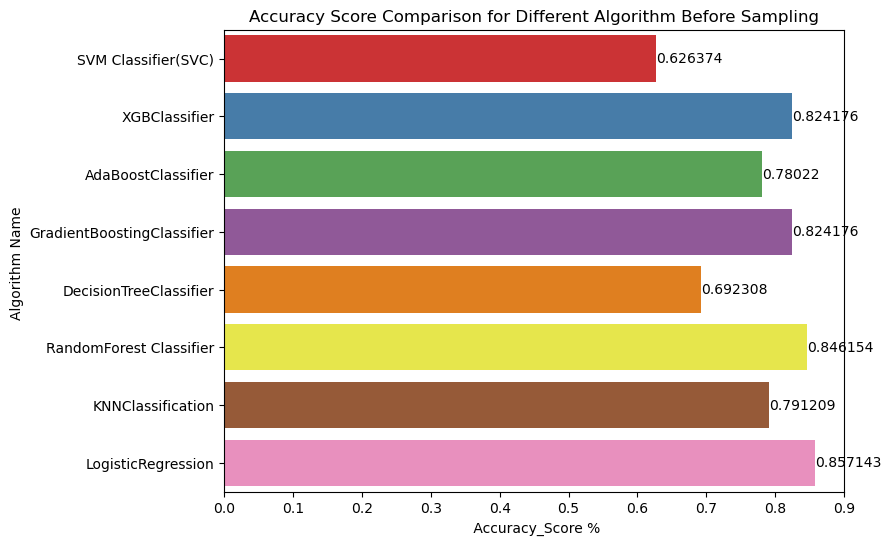

In [47]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy',data=df_allgo_accuracy, palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})
ax.bar_label(ax.containers[0])
ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm Before Sampling")


plt.show()

### 8.3 Accuracy Analysis <a id ="accuracy_analysis"> </a>

- Logistic Regression Classifier are giving better Accuracy that we saw from previous figure.

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        42
           1       0.82      0.94      0.88        49

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

Confusion Matrix: 
 [[32 10]
 [ 3 46]] 

Accuracy Score:  0.8571428571428571
ROC AUC Score:  0.8503401360544218
------------------------------------------------------------ 



Text(0.5, 1.0, 'Precision Recall Curve')

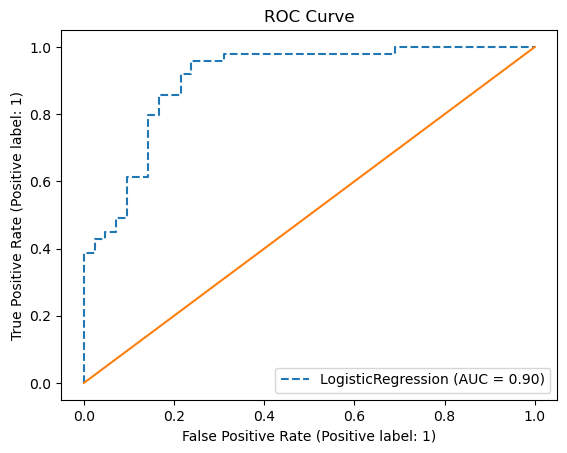

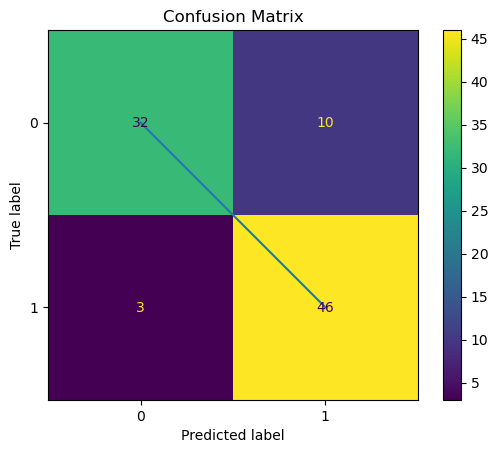

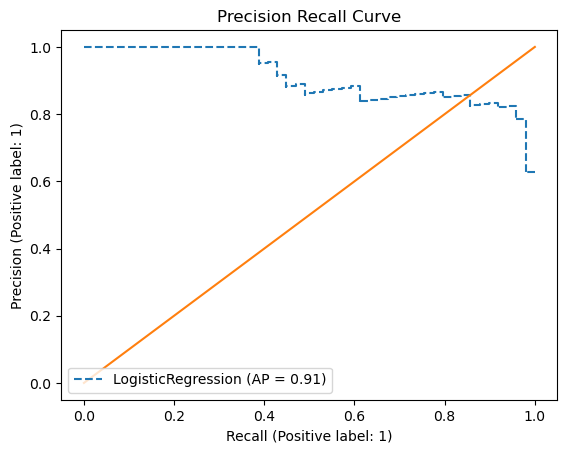

In [48]:
print(classification_report(Ytest,logR_predict))
con_matrix=confusion_matrix(Ytest,logR_predict)
print("Confusion Matrix: \n",con_matrix,"\n")
logR_accuracy=accuracy_score(Ytest,logR_predict)
print("Accuracy Score: ",logR_accuracy)
logR_auc = roc_auc_score(Ytest, logR_predict)
print("ROC AUC Score: ",logR_auc)

plot_roc_curve(logR,Xtest,Ytest,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("ROC Curve")
a="------"
print(a * 10, "\n")

plot_confusion_matrix(logR,Xtest,Ytest)
plt.plot([0,1],[0,1])
plt.title("Confusion Matrix")

plot_precision_recall_curve(logR,Xtest,Ytest,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("Precision Recall Curve")

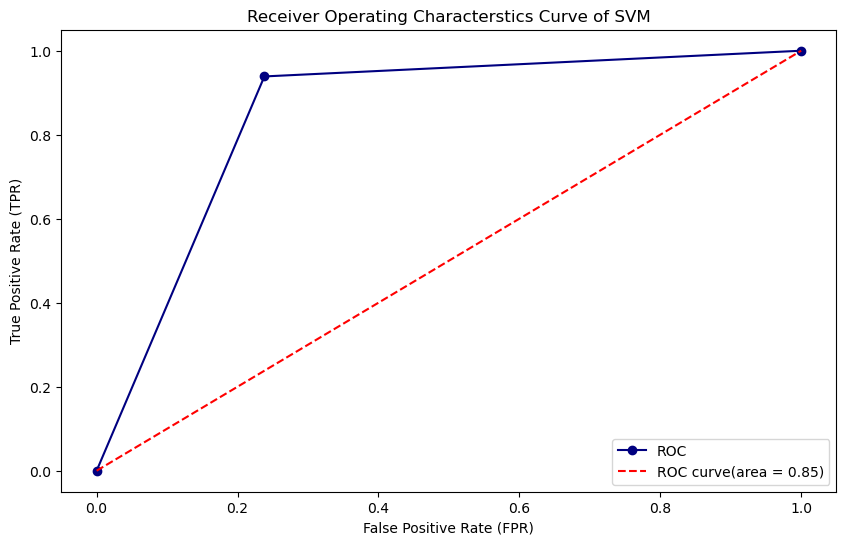

In [49]:
fpr, tpr, thresholds = roc_curve(Ytest,logR_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% logR_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

## 9. Check Outlier <a id ="outlier"> </a>

<AxesSubplot:>

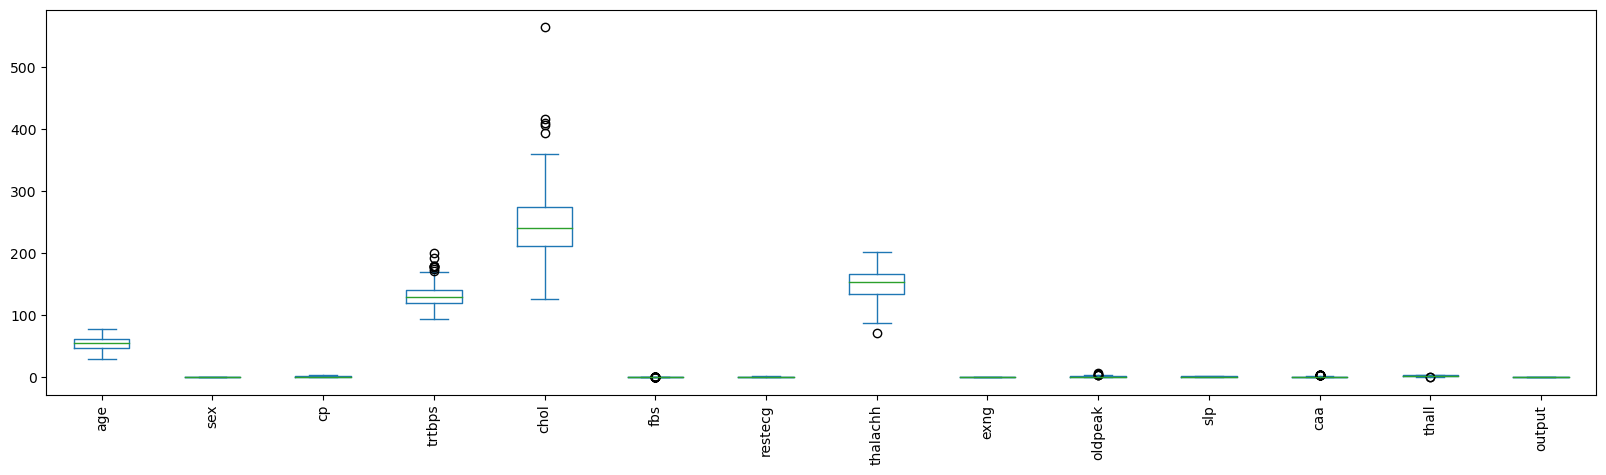

In [50]:
df.plot.box(figsize=(20,5), rot=90)

## 10. Feature Engineering <a id ="feature_engineering"> </a>

### 10.1 Feature Selection using "SelectKBest" <a id ="select_kbest"> </a>

In [51]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.30,random_state=max_state)

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(X_train,Y_train) 

SelectKBest()

#### Check best 6 features

In [53]:
col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
7,thalachh,51.481334
9,oldpeak,50.955660
8,exng,47.131548
2,cp,46.680053
11,caa,46.576628
12,thall,35.699800


### 10.2 ExtraTreesClassifier <a id ="extra_tree"> </a>

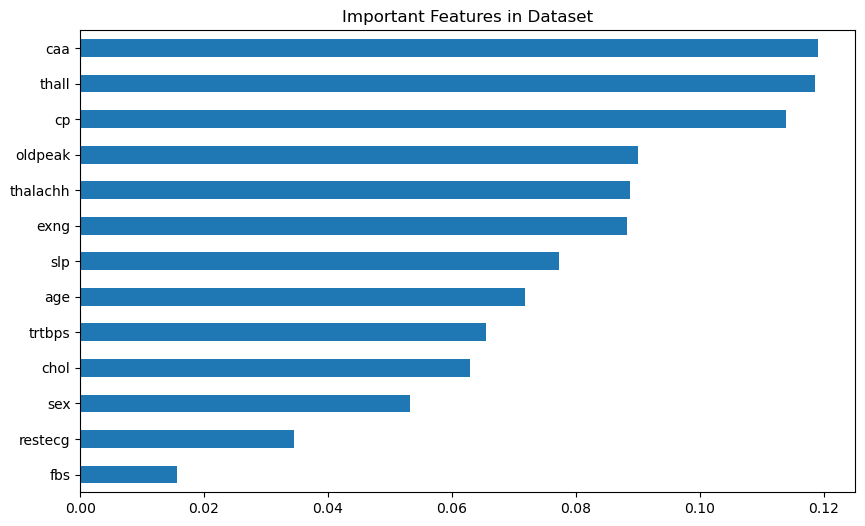

In [54]:
from sklearn.ensemble import ExtraTreesClassifier 
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,Y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

#### Check best 6 Features

In [55]:
important_feat=feat_importances.sort_values(ascending=False)[:6]
important_feat

caa         0.119161
thall       0.118687
cp          0.113979
oldpeak     0.090015
thalachh    0.088813
exng        0.088261
dtype: float64

#### So, We saw that in Both Feature Selection techniques most important feature are following

In [56]:
important_feat_name=important_feat.index
important_feat_name

Index(['caa', 'thall', 'cp', 'oldpeak', 'thalachh', 'exng'], dtype='object')

#### Lets try to find accuracy from selected 6 Features

In [57]:
for col in X.columns:
    if col not in important_feat_name:
        X_train.drop(col,axis=1,inplace=True)
        
for col in X.columns:
    if col not in important_feat_name:
        X_test.drop(col,axis=1,inplace=True)
        

In [58]:
model_name,after_fs_WO_SC_accuracy=model(X_train,X_test,Y_train,Y_test)
model_name,after_fs_WO_SC_accuracy

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.6593406593406593,
  0.8131868131868132,
  0.8021978021978022,
  0.8461538461538461,
  0.6923076923076923,
  0.8241758241758241,
  0.8241758241758241,
  0.8241758241758241])

In [59]:
df_allgo_accuracy['after_fs_WO_SC_accuracy']=after_fs_WO_SC_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy
0,SVM Classifier(SVC),0.626374,0.659341
1,XGBClassifier,0.824176,0.813187
2,AdaBoostClassifier,0.780220,0.802198
3,GradientBoostingClassifier,0.824176,0.846154
4,DecisionTreeClassifier,0.692308,0.692308
5,RandomForest Classifier,0.846154,0.824176
6,KNNClassification,0.791209,0.824176
7,LogisticRegression,0.857143,0.824176


#### Again Plot Accuracy for check difference 

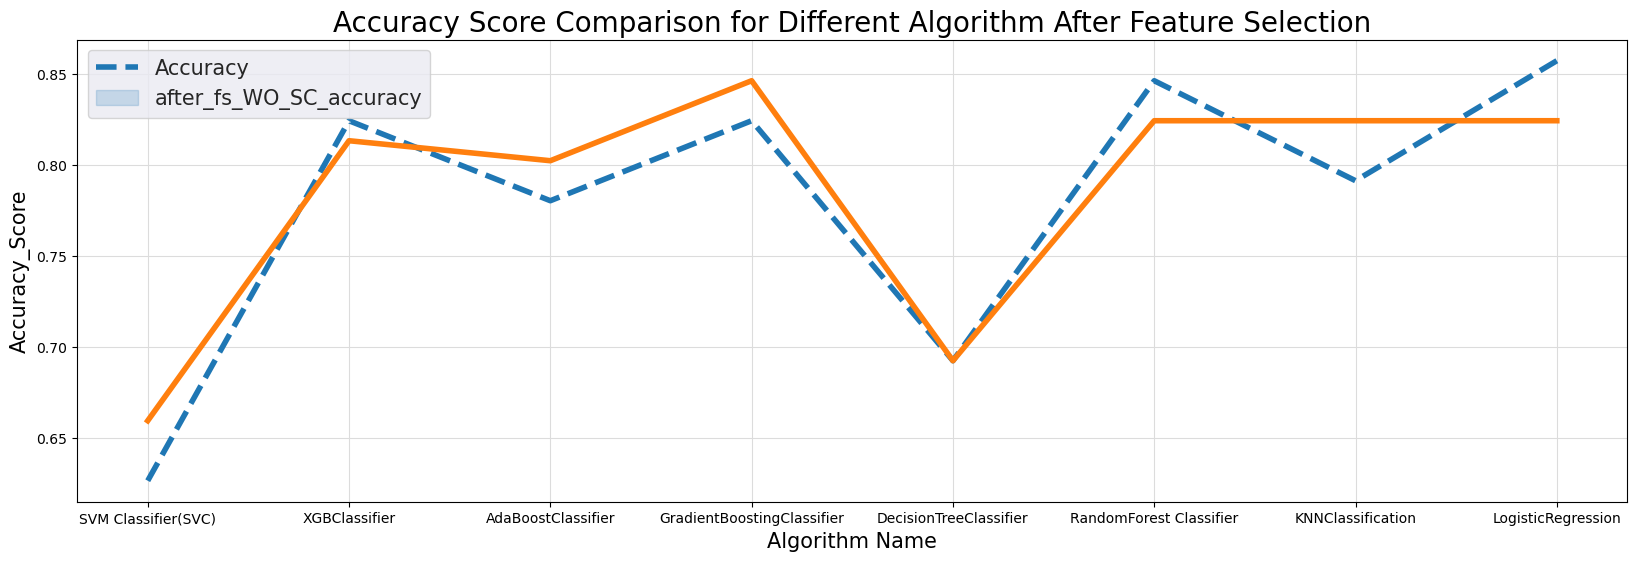

In [60]:
plt.figure(figsize=(20,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--')
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4)
ax.set_xlabel("Algorithm Name",fontsize=15)
ax.set_ylabel("Accuracy_Score",fontsize=15)
ax.grid(color = 'gainsboro')
sns.set_style("darkgrid")
# ax.legend(loc='best',fontsize= 15)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy'],loc='best',fontsize= 15)
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After Feature Selection",fontsize= 20)
plt.show()

## 11. Scalling <a id ="scalling"> </a>

### 11.1 MinMaxScaler  <a id ="minmax"> </a>

In [61]:
mmxscaler = MinMaxScaler()

In [62]:
import warnings
warnings.filterwarnings('ignore')
colls=[X.columns]
for col in colls:
        X[col]=mmxscaler.fit_transform(X[col])
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


<AxesSubplot:>

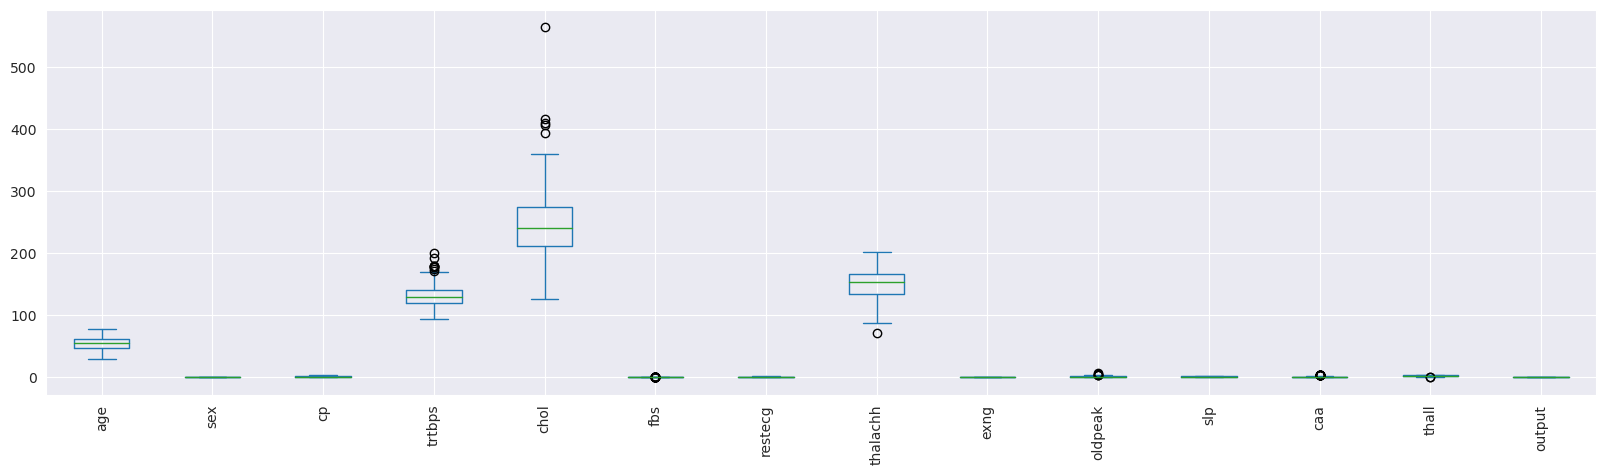

In [63]:
df.plot.box(figsize=(20,5), rot=90)

#### 11.1.1 Again Train and Test for Scalling Data <a id ="again_tt"> </a>

In [64]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.30,random_state=max_state)

In [65]:
model_name,after_scalling_accuracy=model(xtrain,xtest,ytrain,ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [66]:
model_name,after_scalling_accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.8461538461538461,
  0.8241758241758241,
  0.7802197802197802,
  0.8241758241758241,
  0.6923076923076923,
  0.8461538461538461,
  0.7802197802197802,
  0.8241758241758241])

#### Add New Accuracy into Accuracy Dataframe

In [67]:
df_allgo_accuracy['after_scalling_accuracy']=after_scalling_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy
0,SVM Classifier(SVC),0.626374,0.659341,0.846154
1,XGBClassifier,0.824176,0.813187,0.824176
2,AdaBoostClassifier,0.780220,0.802198,0.780220
3,GradientBoostingClassifier,0.824176,0.846154,0.824176
4,DecisionTreeClassifier,0.692308,0.692308,0.692308
5,RandomForest Classifier,0.846154,0.824176,0.846154
6,KNNClassification,0.791209,0.824176,0.780220
7,LogisticRegression,0.857143,0.824176,0.824176


In [68]:
df_allgo_accuracy['Algorithm Name']

0           SVM Classifier(SVC)
1                 XGBClassifier
2            AdaBoostClassifier
3    GradientBoostingClassifier
4        DecisionTreeClassifier
5       RandomForest Classifier
6             KNNClassification
7            LogisticRegression
Name: Algorithm Name, dtype: object

#### Lets plot Accuracy Comparison graph again with new accuracy.

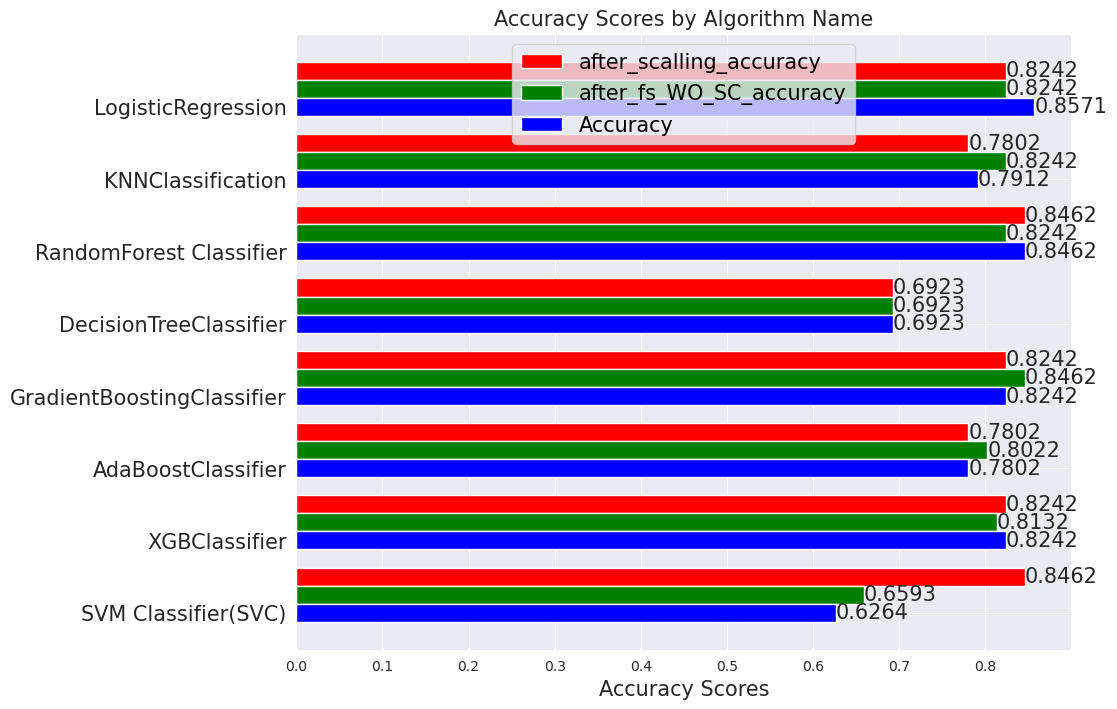

In [69]:

AlgorithmName = df_allgo_accuracy['Algorithm Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))

plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='r')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='g')
plot1 = ax.barh(x , Accuracy, height, label='Accuracy',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Algorithm Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
# fig.tight_layout()

plt.show()

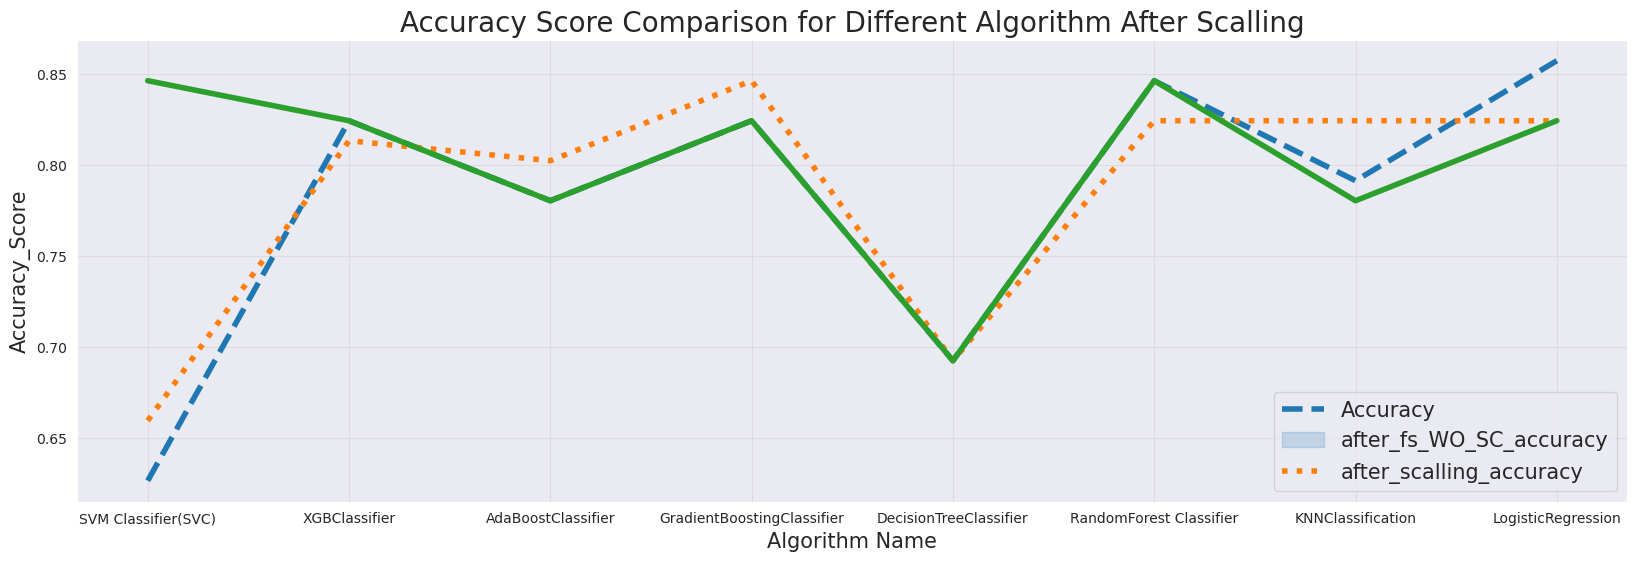

In [70]:
plt.figure(figsize=(20,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--')
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle=':')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_accuracy', data = df_allgo_accuracy,linewidth=4)
ax.set_xlabel("Algorithm Name",fontsize=15)
ax.set_ylabel("Accuracy_Score",fontsize=15)
ax.grid(color = 'gainsboro')
sns.set_style("darkgrid")
# ax.legend(loc='best',fontsize= 15)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy','after_scalling_accuracy'],loc='best',fontsize= 15)
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After Scalling",fontsize= 20)
plt.show()

In [71]:
svc.fit(xtrain,ytrain)
svc_predict=svc.predict(xtest)
print("Complete SVM Classifier(SVC) !")    

Complete SVM Classifier(SVC) !


### Plot Accuracy Score Graph

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.82      0.92      0.87        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91

Confusion Matrix: 
 [[32 10]
 [ 4 45]] 

Accuracy Score:  0.8461538461538461
ROC AUC Score:  0.8401360544217686
------------------------------------------------------------ 



Text(0.5, 1.0, 'Precision Recall Curve')

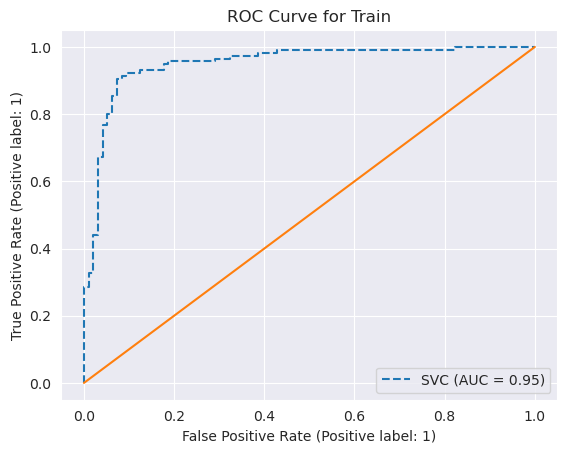

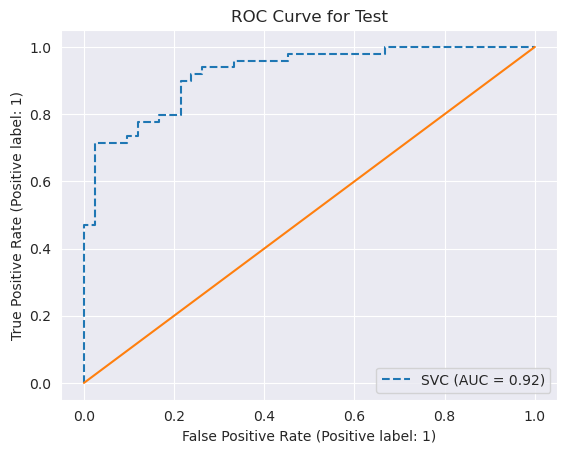

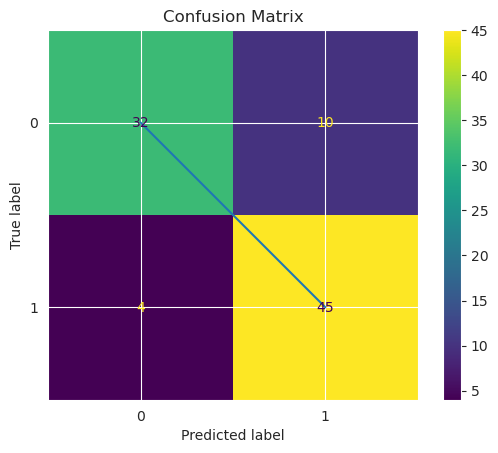

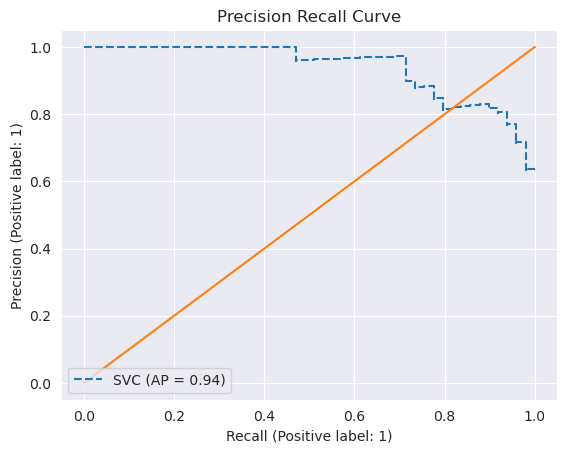

In [72]:
print(classification_report(ytest,svc_predict))
con_matrix=confusion_matrix(ytest,svc_predict)
print("Confusion Matrix: \n",con_matrix,"\n")
svc_accuracy=accuracy_score(ytest,svc_predict)
print("Accuracy Score: ",svc_accuracy)
svc_auc = roc_auc_score(ytest, svc_predict)
print("ROC AUC Score: ",svc_auc)

plot_roc_curve(svc,xtrain,ytrain,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("ROC Curve for Train")

plot_roc_curve(svc,xtest,ytest,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("ROC Curve for Test")

a="------"
print(a * 10, "\n")

plot_confusion_matrix(svc,xtest,ytest)
plt.plot([0,1],[0,1])
plt.title("Confusion Matrix")

plot_precision_recall_curve(svc,xtest,ytest,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("Precision Recall Curve")

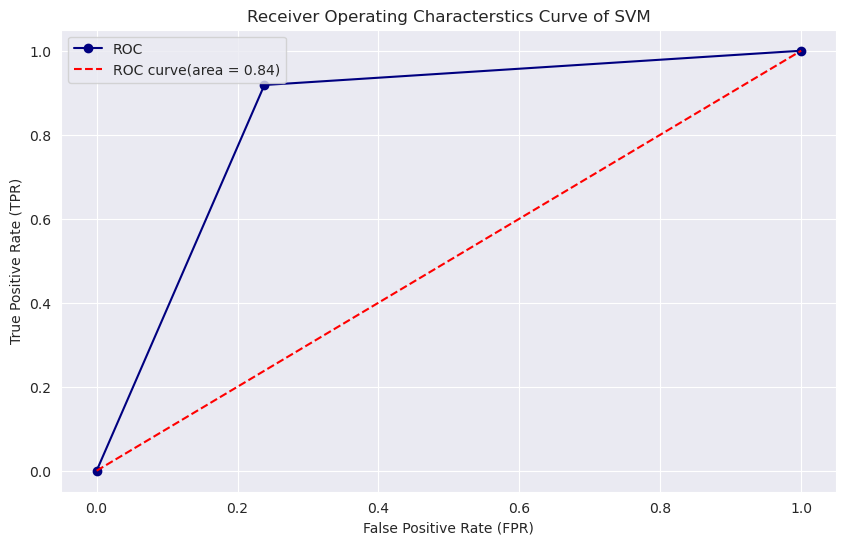

In [73]:
fpr, tpr, thresholds = roc_curve(ytest,svc_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% svc_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

In [74]:
print(fpr)

[0.         0.23809524 1.        ]


### Again Feature Selection using "SelectKBest"

In [75]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.30,random_state=max_state)

In [76]:
#Feature Engineering
#Feature Selection using "SelectKBest"

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x_train,y_train) 

col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
7,thalachh,51.481334
9,oldpeak,50.955660
8,exng,47.131548
2,cp,46.680053
11,caa,46.576628
12,thall,35.699800


### ExtraTreesClassifier

In [77]:
from sklearn.ensemble import ExtraTreesClassifier 

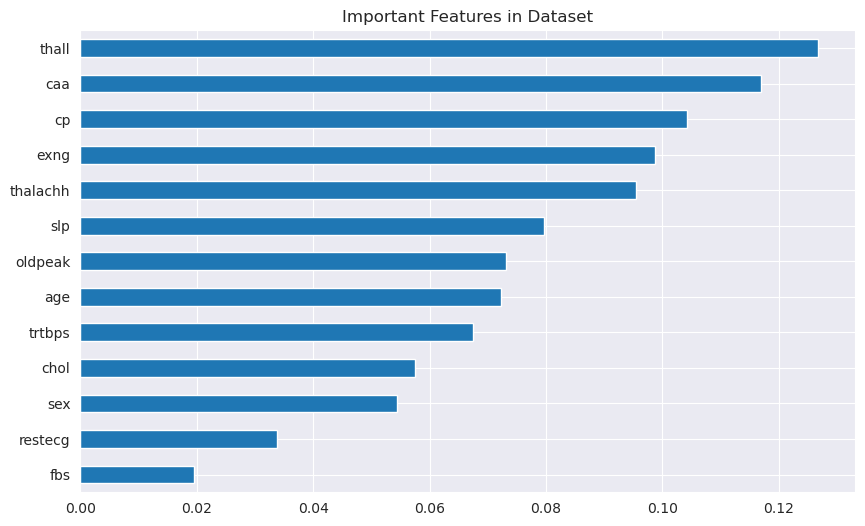

In [78]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(x_train,y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

In [79]:
type(feat_importances)

pandas.core.series.Series

In [80]:
important_feat=feat_importances.sort_values(ascending=False)[:6]

In [81]:
important_feat

thall       0.126764
caa         0.116955
cp          0.104223
exng        0.098733
thalachh    0.095420
slp         0.079595
dtype: float64

### So, We saw that in Both Feature Selection techniques most important feature are following

In [82]:
important_feat_name=important_feat.index
important_feat_name

Index(['thall', 'caa', 'cp', 'exng', 'thalachh', 'slp'], dtype='object')

#### Make update Train and Test Data for selected best Feature

In [83]:
for col in X.columns:
    if col not in important_feat_name:
        x_train.drop(col,axis=1,inplace=True)


In [84]:
x_train.head()

,cp,thalachh,exng,slp,caa,thall
26,0.666667,0.656489,0.0,1.0,0.00,0.666667
16,0.666667,0.770992,0.0,1.0,0.00,0.666667
258,0.000000,0.633588,1.0,0.5,0.00,0.666667
129,0.333333,0.381679,1.0,1.0,0.25,0.666667
140,0.666667,0.656489,0.0,1.0,0.00,0.666667


In [85]:
for col in X.columns:
    if col not in important_feat_name:
        x_test.drop(col,axis=1,inplace=True)
        
x_test.head()

,cp,thalachh,exng,slp,caa,thall
240,0.666667,0.312977,1.0,0.5,0.25,1.000000
117,1.000000,0.694656,0.0,0.5,0.00,1.000000
175,0.000000,0.328244,1.0,0.5,0.00,1.000000
274,0.000000,0.358779,1.0,0.5,0.25,0.666667
254,1.000000,0.412214,0.0,1.0,0.00,0.666667


#### Again Train and Test the model for selected feature

In [86]:
model_name,after_scalling_w_fs_accuracy=model(x_train,x_test,y_train,y_test)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


#### Add New Accuracy into Accuracy Dataframe

In [87]:
df_allgo_accuracy['after_scalling_w_fs_accuracy']=after_scalling_w_fs_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy,after_scalling_w_fs_accuracy
0,SVM Classifier(SVC),0.626374,0.659341,0.846154,0.846154
1,XGBClassifier,0.824176,0.813187,0.824176,0.802198
2,AdaBoostClassifier,0.780220,0.802198,0.780220,0.725275
3,GradientBoostingClassifier,0.824176,0.846154,0.824176,0.824176
4,DecisionTreeClassifier,0.692308,0.692308,0.692308,0.692308
5,RandomForest Classifier,0.846154,0.824176,0.846154,0.835165
6,KNNClassification,0.791209,0.824176,0.780220,0.769231
7,LogisticRegression,0.857143,0.824176,0.824176,0.824176


#### Lets plot Accuracy Comparison graph again with new accuracy

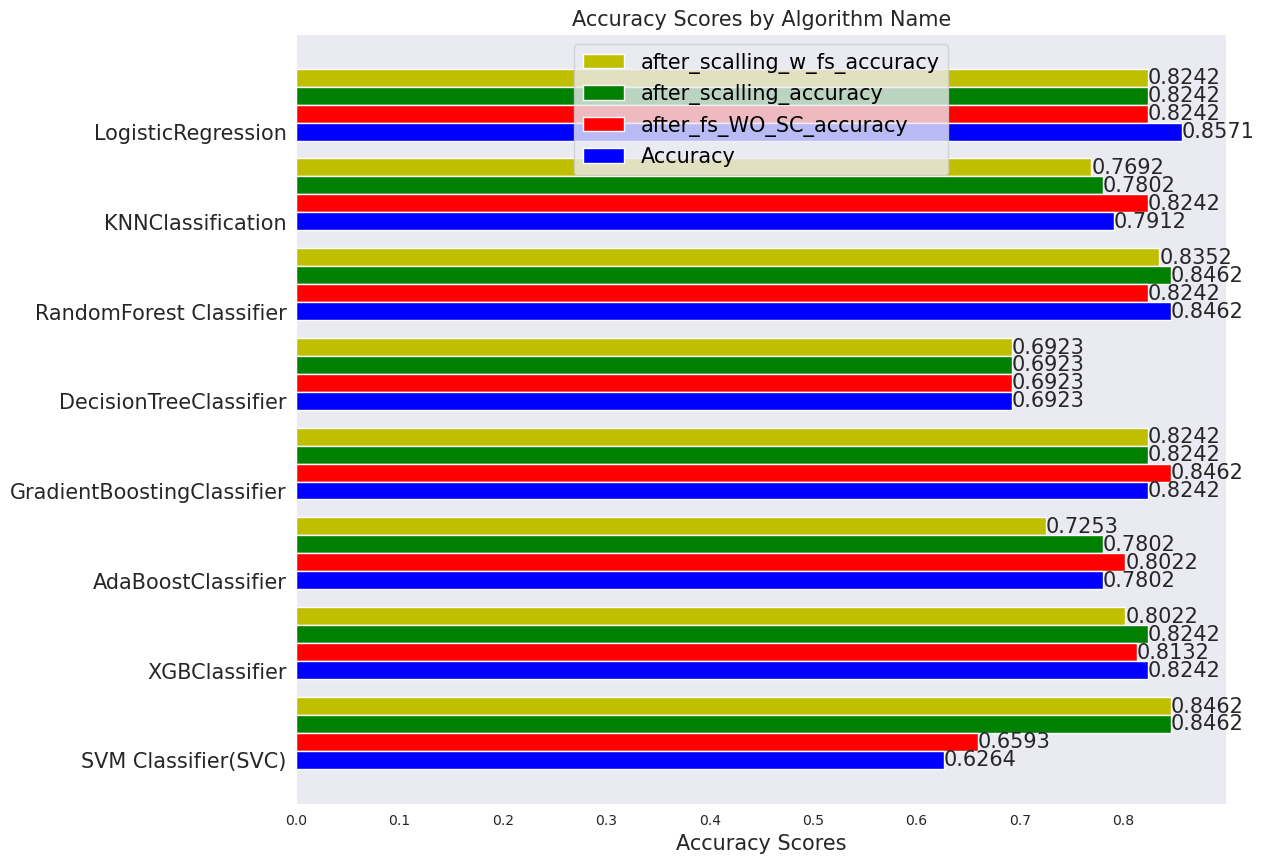

In [88]:
AlgorithmName = df_allgo_accuracy['Algorithm Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)
after_scalling_w_fs_accuracy = df_allgo_accuracy['after_scalling_w_fs_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.20  # the height of the bars

fig, ax = plt.subplots(figsize=(12,10))

plot4 = ax.barh(x + height+height+height, after_scalling_w_fs_accuracy, height, label='after_scalling_w_fs_accuracy',color='y')
plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='g')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='r')
plot1 = ax.barh(x, Accuracy, height, label='Accuracy',color='b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Algorithm Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)
ax.grid()

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
ax.bar_label(ax.containers[3],fontsize= 15)
# fig.tight_layout()
plt.show()

In [89]:
line_name= df_allgo_accuracy.columns.tolist()[1:] 

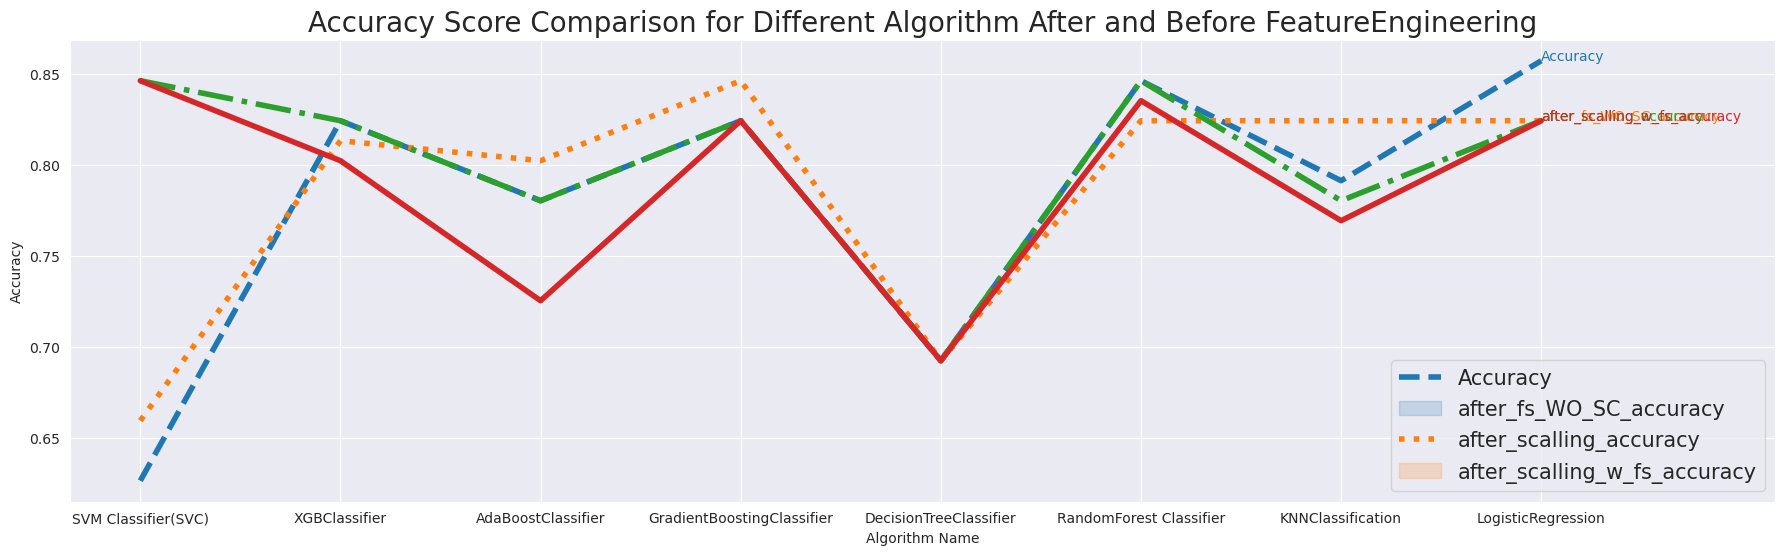

In [90]:
# df1 = pd.melt(df_allgo_accuracy, 'Algorithm Name', var_name='Accuracy', 
#               value_name='Value')
line_name= df_allgo_accuracy.columns.tolist()
plt.figure(figsize=(22,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--',)
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle=':')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='-.')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_w_fs_accuracy', data = df_allgo_accuracy,linewidth=4)

for line, Accuracy in zip(ax.lines, df_allgo_accuracy.columns.tolist()[1:]):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(Accuracy,xy=(x, y),xytext=(0, 0),color=line.get_color(),xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.2)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy','after_scalling_accuracy','after_scalling_w_fs_accuracy'],loc='best',fontsize= 15)
# plt.tight_layout()
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After and Before FeatureEngineering",fontsize= 20)
plt.show()

In [91]:
# X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.30,random_state=40)

## 12. Analysis Summery <a id ="accuracy_summery"> </a>

- We observed from above Accuracy Score Comparison that, SVC(Support Vector Classification) algorithm has perform better accuracy after scalling, that is 85.71 %. But Before Scalling and Feature Selection LogisticRegression also perform same acceracy. So Finally we can use LogisticRegression for our final model.

#### SVC(Support Vector Classification) 

In [92]:
final_model_svc=SVC(kernel='rbf')
final_model_svc.fit(x_train,y_train)
svc_predict=final_model_svc.predict(x_test)
print("Complete SVM Classifier(SVC) !")   

Complete SVM Classifier(SVC) !


              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.82      0.92      0.87        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91

Confusion Matrix: 
 [[32 10]
 [ 4 45]] 

Accuracy Score:  0.8461538461538461
ROC AUC Score:  0.8401360544217686
------------------------------------------------------------ 



Text(0.5, 1.0, 'Precision Recall Curve')

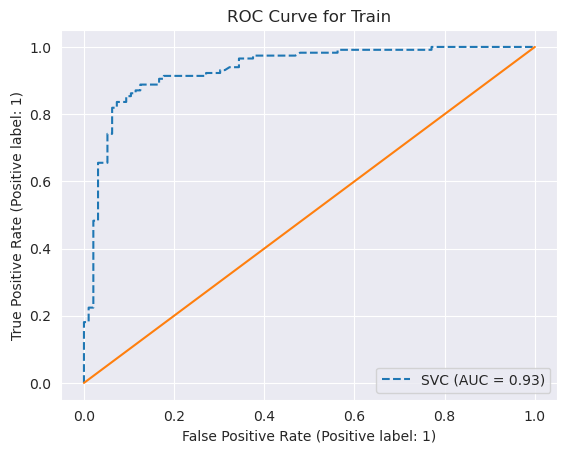

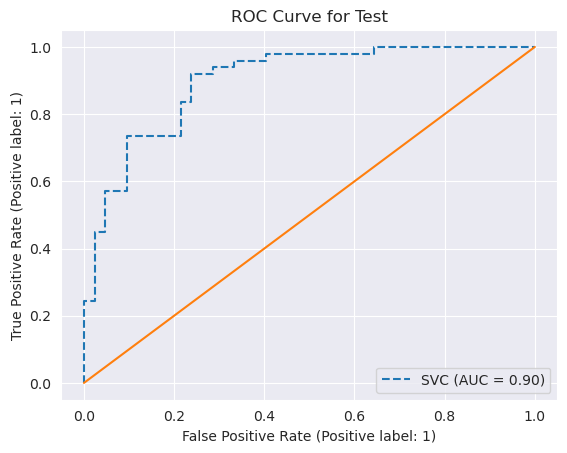

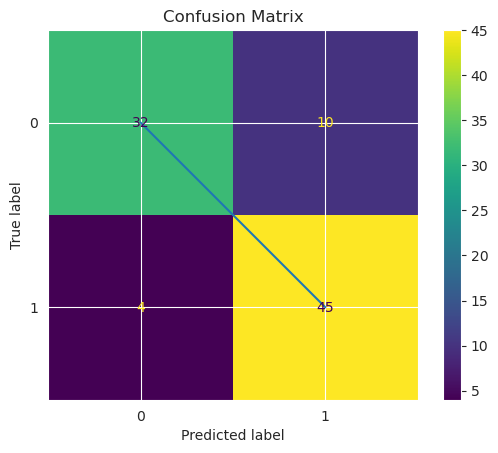

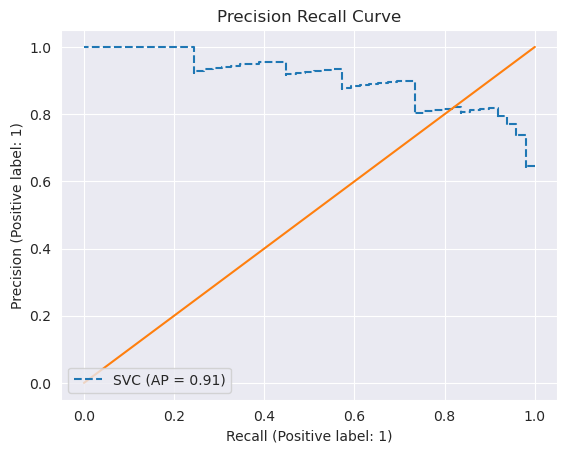

In [93]:
print(classification_report(y_test,svc_predict))
con_matrix=confusion_matrix(y_test,svc_predict)
print("Confusion Matrix: \n",con_matrix,"\n")
svc_accuracy=accuracy_score(y_test,svc_predict)
print("Accuracy Score: ",svc_accuracy)
svc_auc = roc_auc_score(y_test, svc_predict)
print("ROC AUC Score: ",svc_auc)

plot_roc_curve(final_model_svc,x_train,y_train,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("ROC Curve for Train")

plot_roc_curve(final_model_svc,x_test,y_test,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("ROC Curve for Test")

a="------"
print(a * 10, "\n")

plot_confusion_matrix(final_model_svc,x_test,y_test)
plt.plot([0,1],[0,1])
plt.title("Confusion Matrix")

plot_precision_recall_curve(final_model_svc,x_test,y_test,linestyle='--')
plt.plot([0,1],[0,1])
plt.title("Precision Recall Curve")

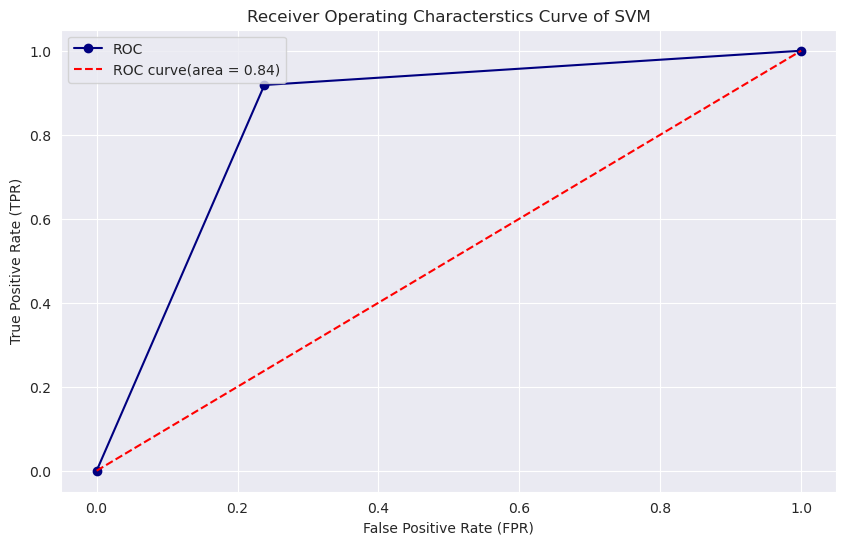

In [94]:
fpr, tpr, thresholds = roc_curve(y_test,svc_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% svc_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

## 13. Model Save and Revalidate <a id ="save_model"> </a>

In [95]:
final_model_LogR=LogisticRegression()
final_model_LogR.fit(Xtrain,Ytrain)
LogR_predict=final_model_LogR.predict(Xtest)
print("Complete LogR Classifier(LogR) !")   

Complete LogR Classifier(LogR) !


In [96]:
import pickle
model_LogR = '/kaggle/working/model_LogR.sav'
pickle.dump(final_model_LogR, open(model_LogR, 'wb'))
 
# some time later...
 
# load the model from disk
model = pickle.load(open(model_LogR, 'rb'))

In [97]:
result = model.score(Xtest, Ytest)
print("Final Model Accuracy: ",result)

Final Model Accuracy:  0.8571428571428571


In [98]:
#Prediction Type 1
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slp':2, 'ca':0, 'thall':3},index=[0])

#prediction1
prediction1 = model.predict(newdata)
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slp,ca,thall
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3


In [99]:
print(prediction1)

if (prediction1[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [100]:
val=Xtest.head(30)
val.head()
Xval=val
Yval=Ytest.head(30)

In [101]:
result3 = model.predict(Xval)
print(result3)

[0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]


In [102]:
result4 = model.score(Xval, Yval)
print("Final Model Accuracy: ",result4)

Final Model Accuracy:  0.7333333333333333


In [103]:
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slp':2, 'ca':0, 'thall':3},index=[0])

#prediction2
prediction2 = model.predict(newdata)

print(prediction2)
if (prediction2[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [104]:
# Prediction Type 2
input_data = (62,0,0,160,164,0,0,145,0,6.2,0,3,3)

# change the input data to a numpy array
numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = numpy_array.reshape(1,-1)

#prediction3 
prediction3 = model.predict(input_data_reshaped)
print(prediction3)
if (prediction3[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [105]:
Xtest.tail(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [106]:
Ytest.tail(5)

6      1
300    0
204    0
137    1
47     1
Name: output, dtype: int64

## 14. Conclusion: <a id ="conclusion"> </a>

<p> In Conclusion, heart disease is a potentially fatal condition that affects millions of individuals every year. Hence, early detection of heart disease can help patients and medical professionals by giving them the knowledge they need to lower mortality and expenditures. Machine learning algorithms can play a significant role in analyzing this medical data and diagnosing illnesses as a result of the daily rise in medical big data and the falling cost of data storage. I can create a machine-learning model with the aid of the Logistic Regression Classifier method. A dataset obtained from The Careerera was used to train and test my model.The dataset was made up of <b> 303 </b>tagged people, including both those with heart disease and healthy individuals. I was able to attain an accuracy of <b> 85.71% </b> with the default hyperparameter after the model was trained and evaluated. I discovered that the default resulted in the greatest value while I was trying to adjust the hyperparameter for the Logistic Regression Classifier. I've come to the conclusion that data mining and machine learning have a significant place in the healthcare system. Conventional methods and medical judgment were used to diagnose diseases, but these methods had drawbacks and were expensive to use. Machine learning models allow for the efficient use of big datasets to diagnose diseases.</p>

#### NB: Please don't forget to write me for inspiration! and also if find any mistake please comment me.